In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [155]:
timeseries_tests = pd.DataFrame(requests.get("https://covidtracking.com/api/states/daily").json())
timeseries_tests['stateName'] = timeseries_tests.state
timeseries_tests['dateColumn'] = pd.to_datetime(timeseries_tests.dateChecked)
timeseries_tests = timeseries_tests.sort_values('dateColumn')

In [156]:
grouped_timeseries = timeseries_tests.groupby(['state', 'dateChecked']).min()

In [157]:
grouped_timeseries['positive_ratio'] = grouped_timeseries.positive / grouped_timeseries.total

In [175]:
_states = {
#     'FL': 'green',
    'NY': 'red',
    'CA': 'yellow',
    'WA': 'blue',
#     'MD': 'orange',
}

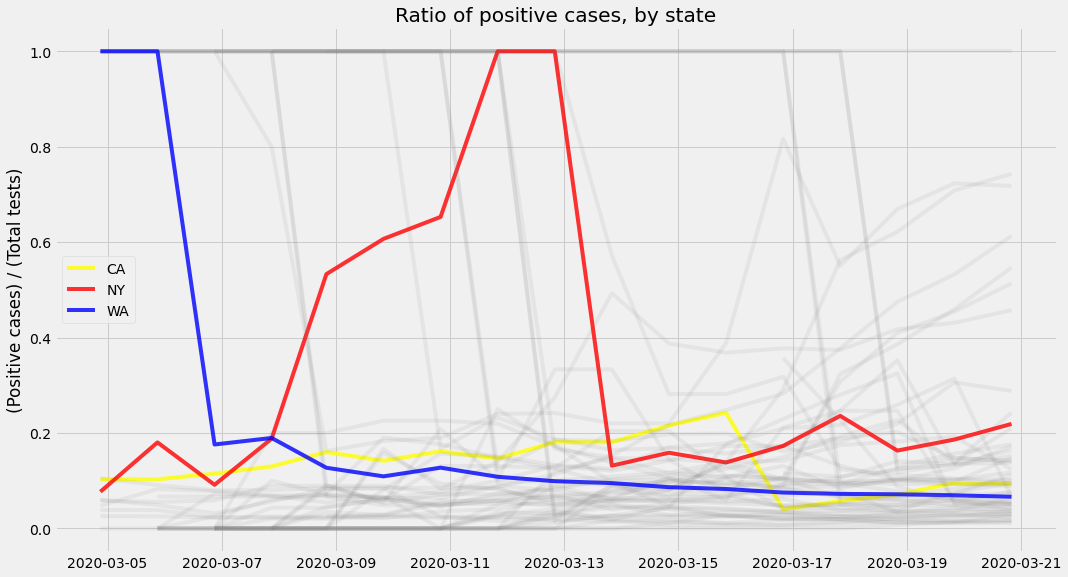

In [176]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(16, 9))
    for state in list(grouped_timeseries.stateName.unique()):
        plt.plot(
            grouped_timeseries.loc[state, :].dateColumn,
            grouped_timeseries.loc[state, :].positive_ratio,
            c = _states[state] if state in _states else 'grey',
            alpha = 0.8 if state in _states else 0.1,
            label = state if state in _states else None
        )
    plt.title("Ratio of positive cases, by state")
    plt.ylabel("(Positive cases) / (Total tests)")
    plt.legend()
    plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  # This is added back by InteractiveShellApp.init_path()
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  # This is added back by InteractiveShellApp.init_path()
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  # This is added back by InteractiveShellApp.init_path()


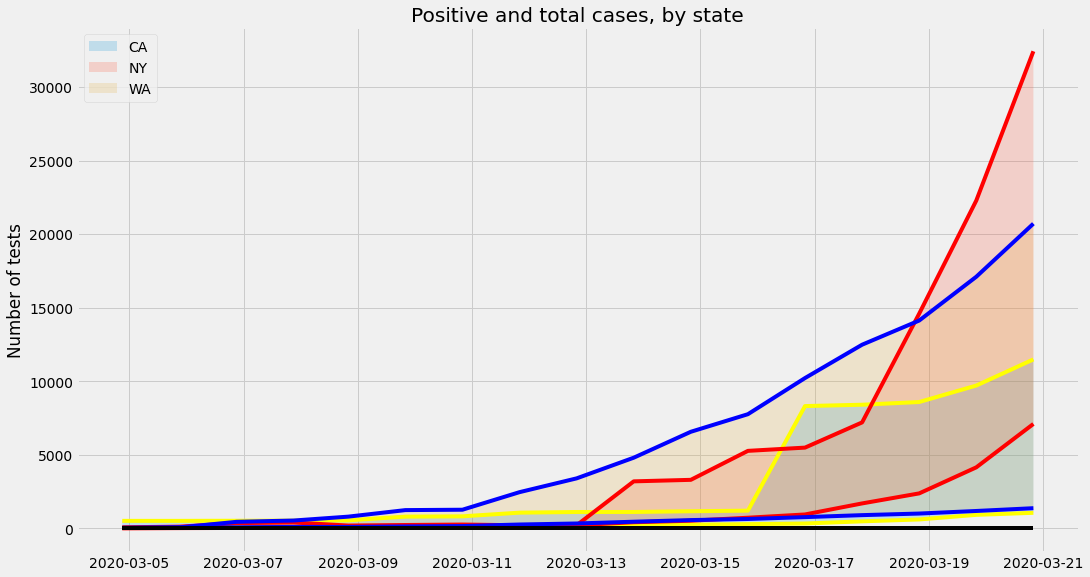

In [185]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(16, 9))
    for state in list(grouped_timeseries.stateName.unique()):
        if state in _states:
            plt.fill_between(
                grouped_timeseries.loc[state, :].dateColumn,
                grouped_timeseries.loc[state, :].positive,
                grouped_timeseries.loc[state, :].total,
                _states[state] if state in _states else 'grey',
                alpha=0.2,
                label=state
            )
            plt.plot(
                grouped_timeseries.loc[state, :].dateColumn,
                grouped_timeseries.loc[state, :].total,
                _states[state] if state in _states else 'grey',
                alpha=1,
                label=None
            )
            plt.plot(
                grouped_timeseries.loc[state, :].dateColumn,
                grouped_timeseries.loc[state, :].positive,
                _states[state] if state in _states else 'grey',
                alpha=1,
                label=None
            )
        plt.plot(
            grouped_timeseries.loc[state, :].dateColumn,
            grouped_timeseries.loc[state, :].total * 0,
            c='black',
            alpha=1, label=None
        )

    plt.legend(loc='upper left')
    plt.title("Positive and total cases, by state")
    plt.ylabel("Number of tests")
    plt.show()    

In [189]:
grouped_timeseries.loc['CA', :]

,date,positive,negative,pending,death,total,stateName,dateColumn,positive_ratio
dateChecked,,,,,,,,,
2020-03-04T21:00:00Z,20200304,53,462.0,NaN,NaN,515,CA,2020-03-04 21:00:00+00:00,0.102913
2020-03-05T21:00:00Z,20200305,53,462.0,NaN,NaN,515,CA,2020-03-05 21:00:00+00:00,0.102913
2020-03-06T21:00:00Z,20200306,60,462.0,NaN,NaN,522,CA,2020-03-06 21:00:00+00:00,0.114943
2020-03-07T21:00:00Z,20200307,69,462.0,NaN,NaN,531,CA,2020-03-07 21:00:00+00:00,0.129944
2020-03-08T20:00:00Z,20200308,88,462.0,NaN,NaN,550,CA,2020-03-08 20:00:00+00:00,0.160000
2020-03-09T20:00:00Z,20200309,114,690.0,NaN,NaN,804,CA,2020-03-09 20:00:00+00:00,0.141791
2020-03-10T20:00:00Z,20200310,133,690.0,NaN,NaN,823,CA,2020-03-10 20:00:00+00:00,0.161604
2020-03-11T20:00:00Z,20200311,157,916.0,NaN,NaN,1073,CA,2020-03-11 20:00:00+00:00,0.146319
2020-03-12T20:00:00Z,20200312,202,916.0,NaN,4.0,1118,CA,2020-03-12 20:00:00+00:00,0.180680
